In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class ModelTrainer:
    def __init__(self, df, target_column):
        self.df = df
        self.target_column = target_column
        self.models = {}
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4

    def preprocess_data(self):
        # Drop non-numerical columns
        self.df = self.df.select_dtypes(include=['number', 'bool'])
        X = self.df.drop(columns=[self.target_column])
        y = self.df[self.target_column]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(f"Data Preprocessed: Train Shape: {self.X_train.shape}, Test Shape: {self.X_test.shape}")

    def train_gradient_boosting(self, param_grid):
        self.preprocess_data()
        gbm = GradientBoostingClassifier(random_state=42)
        grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='roc_auc', error_score='raise', verbose=1)
        try:
            grid_search.fit(self.X_train, self.y_train)
            self.models['GradientBoosting'] = grid_search.best_estimator_
            print(f"Gradient Boosting Best Params: {grid_search.best_params_}")
        except Exception as e:
            print(f"Error in Gradient Boosting: {e}")

    def train_xgboost(self, param_grid):
        self.preprocess_data()
        xgb = XGBClassifier(random_state=42, use_label_encoder=False)
        grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', error_score='raise', verbose=1)
        try:
            grid_search.fit(self.X_train, self.y_train)
            self.models['XGBoost'] = grid_search.best_estimator_
            print(f"XGBoost Best Params: {grid_search.best_params_}")
        except Exception as e:
            print(f"Error in XGBoost: {e}")

    def plot_roc_curve(self):
        for name, model in self.models.items():
            try:
                y_pred = model.predict_proba(self.X_test)[:, 1]
                fpr, tpr, _ = roc_curve(self.y_test, y_pred)
                auc_score = roc_auc_score(self.y_test, y_pred)
                plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
            except Exception as e:
                print(f"Error in ROC plotting for {name}: {e}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.show()



Evaluating ../Data/merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv...
Loaded data from ../Data/merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv. Shape: (314, 14)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_lalo kile_Q3.csv...
Loaded data from ../Data/merged_weekly_lalo kile_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Dale sadi_Q3.csv...
Loaded data from ../Data/merged_weekly_Dale sadi_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Hawa Gelan_Q3.csv...
Loaded data from ../Data/merged_weekly_Hawa Gelan_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Anfilo_Q3.csv...
Loaded data from ../Data/merged_weekly_Anfilo_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Dale Wabera_Q3.csv...
Loaded data from ../Data/merged_weekly_Dale Wabera_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Dambi Dollo_Q3.csv...
Loaded data from ../Data/merged_weekly_Dambi Dollo_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_gawo kebe_Q3.csv...
Loaded data from ../Data/merged_weekly_gawo kebe_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Gidami Primery Hospital_Q3.csv...
Loaded data from ../Data/merged_weekly_Gidami Primery Hospital_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Gidami_Q3.csv...
Loaded data from ../Data/merged_weekly_Gidami_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Hawa Galan Primery Hospital_Q3.csv...
Loaded data from ../Data/merged_weekly_Hawa Galan Primery Hospital_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_jima horo_Q3.csv...
Loaded data from ../Data/merged_weekly_jima horo_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_kake primary hospital_Q3.csv...
Loaded data from ../Data/merged_weekly_kake primary hospital_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_sadi chanka_Q3.csv...
Loaded data from ../Data/merged_weekly_sadi chanka_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_sayo_Q3.csv...
Loaded data from ../Data/merged_weekly_sayo_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

Evaluating ../Data/merged_weekly_Yemalogi Walal_Q3.csv...
Loaded data from ../Data/merged_weekly_Yemalogi Walal_Q3.csv. Shape: (314, 18)


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:01:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use

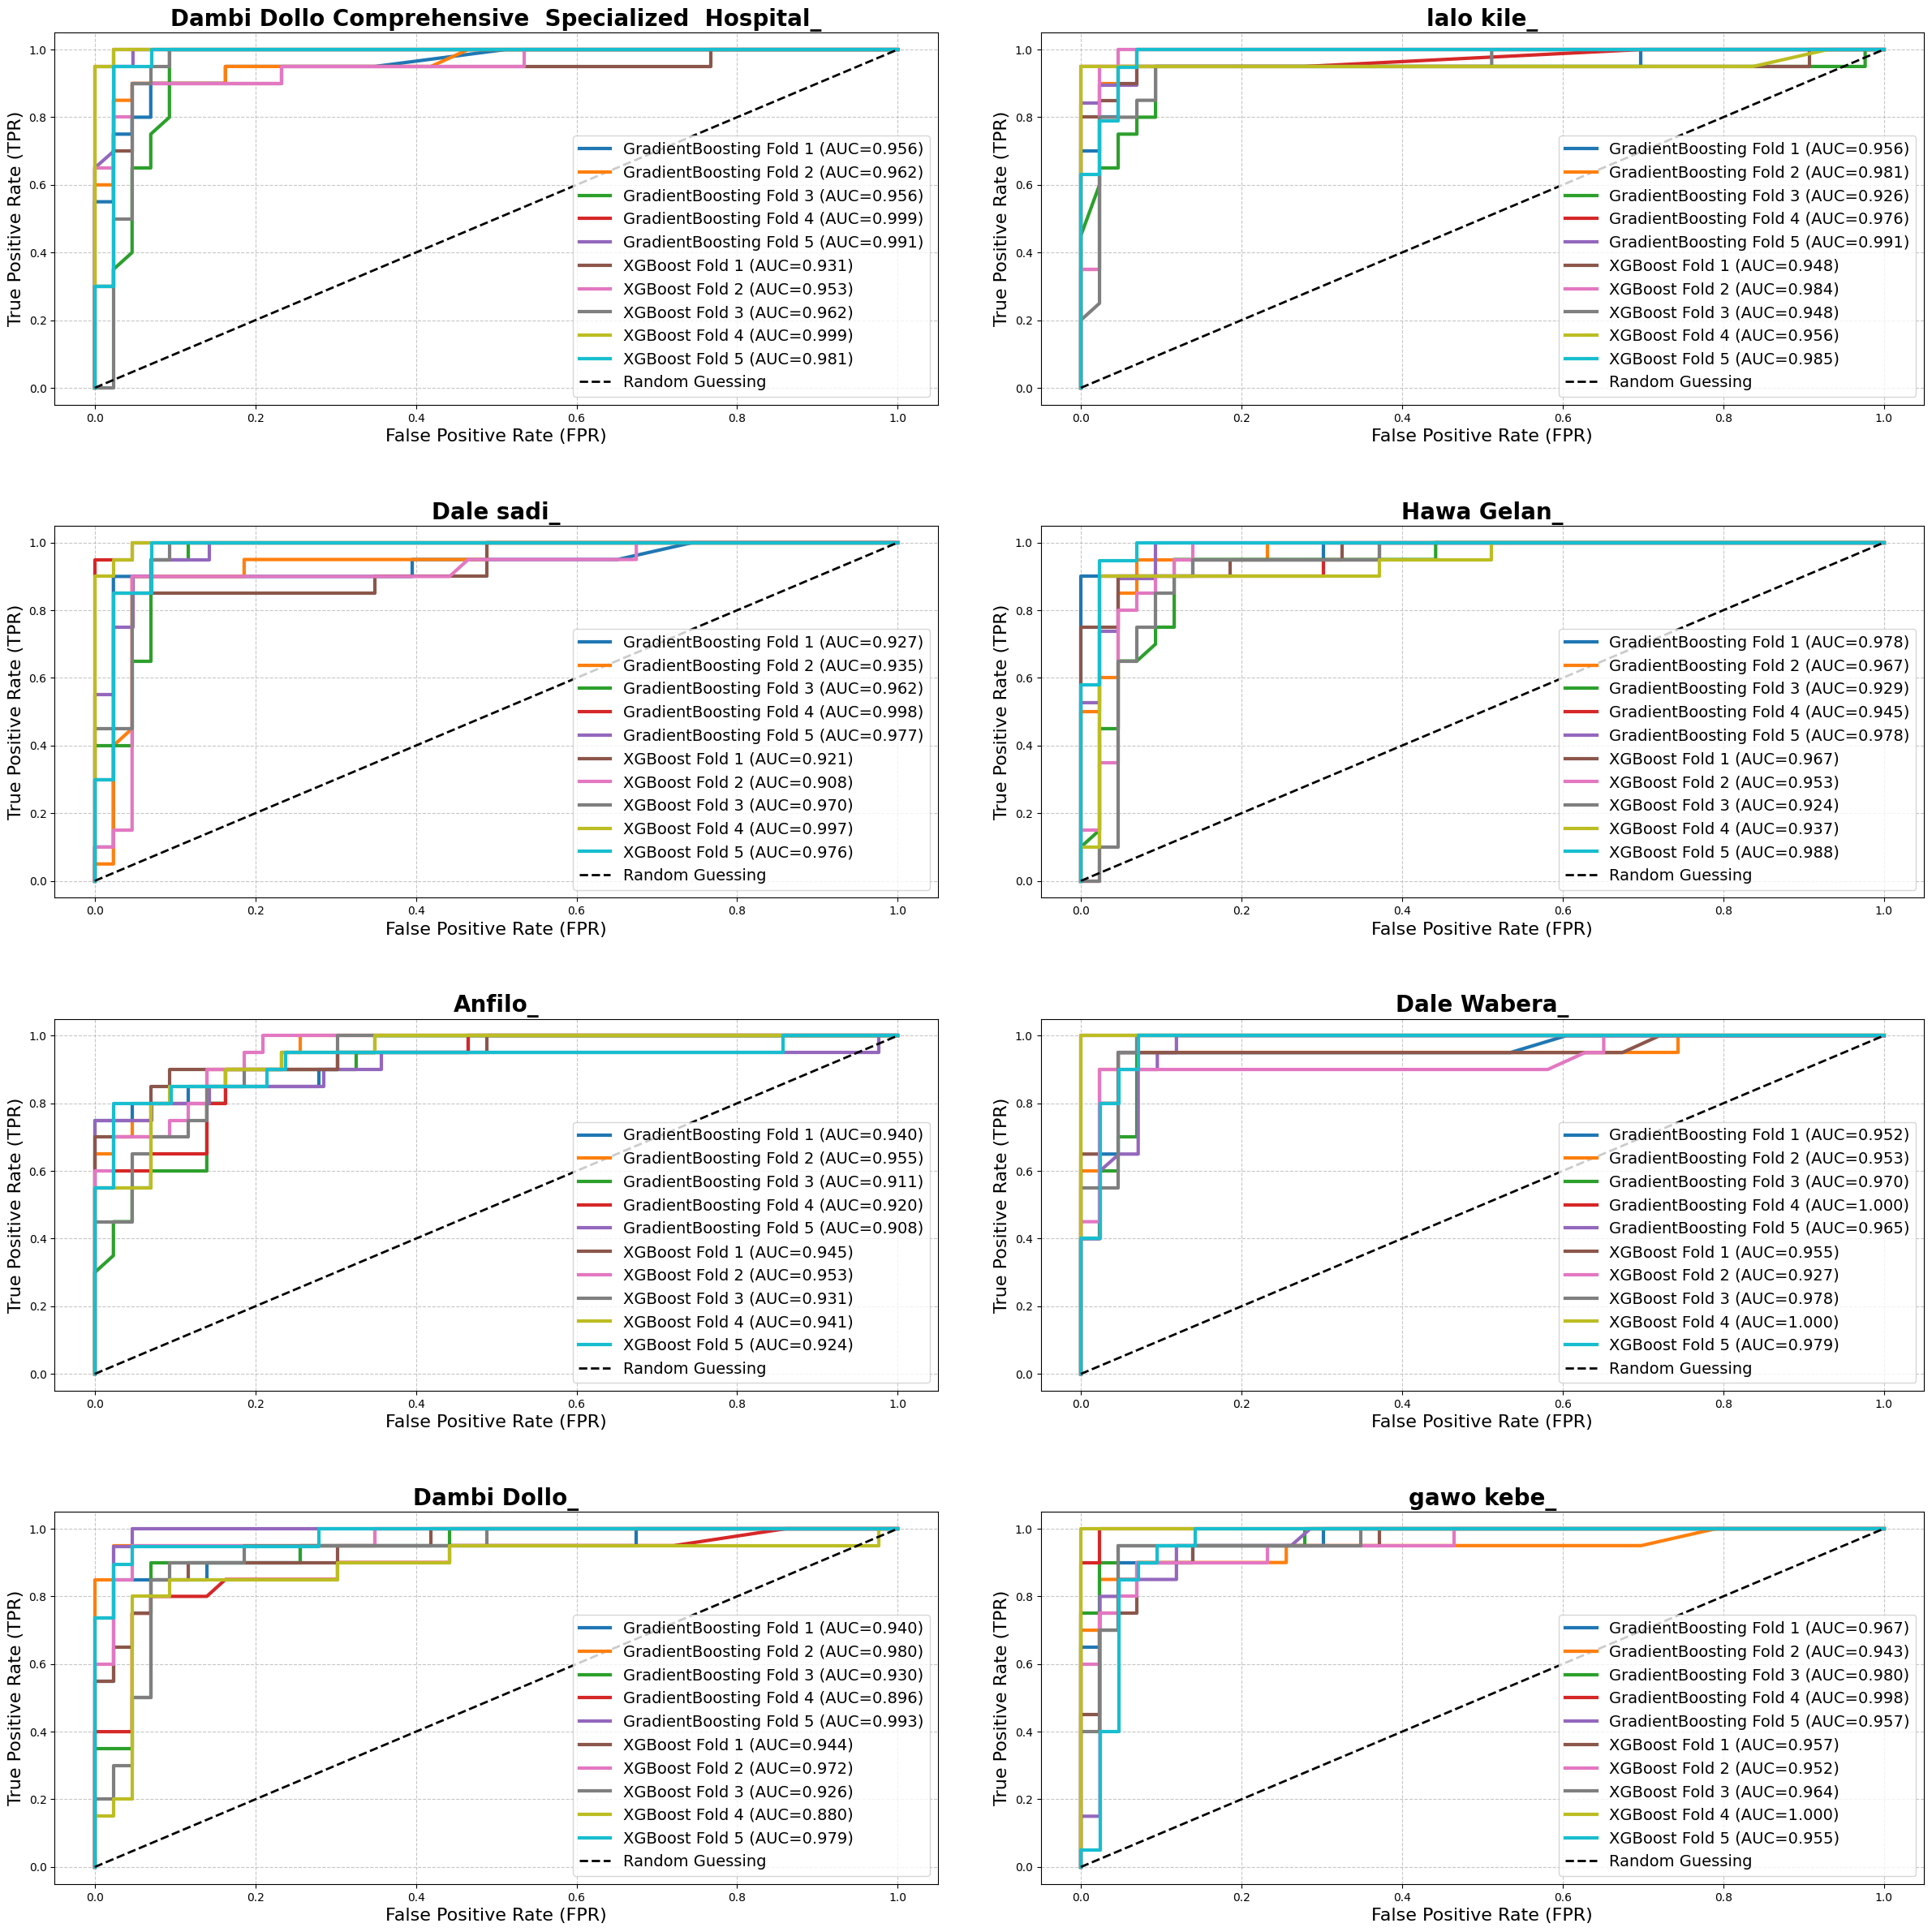


Results for merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv:
  GradientBoosting: Average AUC = 0.9727
  Fold-wise AUCs: [np.float64(0.9563953488372093), np.float64(0.9616279069767442), np.float64(0.9558139534883721), np.float64(0.9988372093023257), np.float64(0.9910714285714286)]
  XGBoost: Average AUC = 0.9653
  Fold-wise AUCs: [np.float64(0.9313953488372094), np.float64(0.9534883720930233), np.float64(0.9616279069767443), np.float64(0.9988372093023256), np.float64(0.980952380952381)]

Results for merged_weekly_lalo kile_Q3.csv:
  GradientBoosting: Average AUC = 0.9661
  Fold-wise AUCs: [np.float64(0.9558139534883722), np.float64(0.9813953488372094), np.float64(0.9261627906976743), np.float64(0.9755813953488371), np.float64(0.9914320685434517)]
  XGBoost: Average AUC = 0.9642
  Fold-wise AUCs: [np.float64(0.9476744186046512), np.float64(0.9837209302325581), np.float64(0.9482558139534883), np.float64(0.9558139534883721), np.float64(0.9853121175030599)]

Results f

TypeError: ModelEvaluator.__init__() takes 2 positional arguments but 3 were given

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class ModelEvaluator:
    def __init__(self, files):
        self.files = files
        self.results = {}

    def load_data(self, file_path):
        try:
            df = pd.read_csv(file_path)
            print(f"Loaded data from {file_path}. Shape: {df.shape}")
            return df
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            return None

    def preprocess_data(self, df, target_column):
        df = df.select_dtypes(include=['number', 'bool']).dropna()  # Retain numeric columns and drop missing values
        X = df.drop(columns=[target_column], errors='ignore')
        y = df[target_column] if target_column in df.columns else None
        if y is None:
            raise ValueError(f"Target column '{target_column}' not found in the dataset.")
        return X, y

    def cross_validate_model(self, X, y, model_name, param_grid):
        if model_name == "GradientBoosting":
            model = GradientBoostingClassifier(random_state=42)
        elif model_name == "XGBoost":
            model = XGBClassifier(random_state=42, use_label_encoder=False)
        else:
            raise ValueError(f"Unsupported model: {model_name}")

        # 5-fold Stratified Cross-Validation
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        auc_scores = []
        fprs, tprs = [], []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.set_params(**param_grid)  # Use a single set of parameters
            model.fit(X_train, y_train)
            y_pred = model.predict_proba(X_test)[:, 1]

            auc_score = roc_auc_score(y_test, y_pred)
            fpr, tpr, _ = roc_curve(y_test, y_pred)

            auc_scores.append(auc_score)
            fprs.append(fpr)
            tprs.append(tpr)

        return auc_scores, fprs, tprs

    def evaluate_file(self, file_path):
        df = self.load_data(file_path)
        if df is None:
            return

        target_column = 'target'  # Adjust as needed for your dataset
        try:
            X, y = self.preprocess_data(df, target_column)
            param_grid = {'learning_rate': 0.1, 'n_estimators': 100}  # Example parameter values

            results = {}
            for model_name in ["GradientBoosting", "XGBoost"]:
                auc_scores, fprs, tprs = self.cross_validate_model(X, y, model_name, param_grid)
                results[model_name] = {"AUC Scores": auc_scores, "FPRs": fprs, "TPRs": tprs}

            self.results[os.path.basename(file_path)] = results
        except Exception as e:
            print(f"Error evaluating file {file_path}: {e}")

    def evaluate_all_files(self):
        for file_path in self.files:
            print(f"Evaluating {file_path}...")
            self.evaluate_file(file_path)

        self.plot_auc_curves()

        # Print a summary of results
        for file_name, file_results in self.results.items():
            print(f"\nResults for {file_name}:")
            for model_name, result in file_results.items():
                avg_auc = np.mean(result["AUC Scores"])
                print(f"  {model_name}: Average AUC = {avg_auc:.4f}")
                print(f"  Fold-wise AUCs: {result['AUC Scores']}")

    def plot_auc_curves(self):
        # Create a 4x4 grid for subplots
        fig, axes = plt.subplots(4, 2, figsize=(25, 25))  # 4 rows, 4 columns, larger figure size for clarity

        # Flatten axes array for easier iteration
        axes = axes.flatten()

        # Mapping for station names based on file name, remove "merged_weekly_" and "Q3" suffix
        for i, (ax, (file_name, file_results)) in enumerate(zip(axes, self.results.items())):
            # Remove "merged_weekly_" and "Q3" to extract the station name
            station_name = file_name.replace("merged_weekly_", "").replace(".csv", "").replace("Q3", "").strip()

            ax.set_title(f"{station_name}", fontsize=20, fontweight='bold')  # Title with larger font
            ax.set_xlabel("False Positive Rate (FPR)", fontsize=16)
            ax.set_ylabel("True Positive Rate (TPR)", fontsize=16)

            # Iterate over models and plot each fold
            for model_name, result in file_results.items():
                for fold_idx, (fpr, tpr) in enumerate(zip(result["FPRs"], result["TPRs"])):
                    auc_score = result["AUC Scores"][fold_idx]
                    ax.plot(fpr, tpr, label=f"{model_name} Fold {fold_idx + 1} (AUC={auc_score:.3f})", linewidth=3)

            ax.plot([0, 1], [0, 1], 'k--', label="Random Guessing", linewidth=2)  # Diagonal line for random guessing
            ax.legend(loc="lower right", fontsize=14)
            ax.grid(True, linestyle='--', alpha=0.7)  # Grid with dashed lines

        # Move the plot to column 3, row 4 (indexing is zero-based, so 2, 3)
        # Clear the rest of the subplots (i.e., those not used for your plots)
        for j in range(len(self.results), 16):
            fig.delaxes(axes[j])

        # Adjust the layout for better spacing
        plt.tight_layout(pad=5.0)  # Increase padding between subplots
        plt.show()
# Example Usage
# List of dataset files
files = [
    '../Data/merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv',
    '../Data/merged_weekly_lalo kile_Q3.csv',
    '../Data/merged_weekly_Dale sadi_Q3.csv',
    '../Data/merged_weekly_Hawa Gelan_Q3.csv',
    '../Data/merged_weekly_Anfilo_Q3.csv',
    '../Data/merged_weekly_Dale Wabera_Q3.csv',
    '../Data/merged_weekly_Dambi Dollo_Q3.csv',
    '../Data/merged_weekly_gawo kebe_Q3.csv',
    '../Data/merged_weekly_Gidami Primery Hospital_Q3.csv',
    '../Data/merged_weekly_Gidami_Q3.csv',
    '../Data/merged_weekly_Hawa Galan Primery Hospital_Q3.csv',
    '../Data/merged_weekly_jima horo_Q3.csv',
    '../Data/merged_weekly_kake primary hospital_Q3.csv',
    '../Data/merged_weekly_sadi chanka_Q3.csv',
    '../Data/merged_weekly_sayo_Q3.csv',
    '../Data/merged_weekly_Yemalogi Walal_Q3.csv'
]

# Initialize the ModelEvaluator class with the files list
evaluator = ModelEvaluator(files)

# Evaluate models for all files
evaluator.evaluate_all_files()

X = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100)
})
y = np.random.choice([0, 1], size=100)  # Binary target

# Initialize ModelEvaluator
evaluator = ModelEvaluator(X, y)

# Evaluate and plot ROC curves for all models
evaluator.plot_roc()

# SHAP summary plot for a specific model (e.g., Random Forest)
evaluator.shap_summary_plot(evaluator.models['Random Forest'], feature_names=X.columns)

# SHAP force plot for an individual prediction
shap_force_html = evaluator.shap_force_plot(
    evaluator.models['Random Forest'], feature_names=X.columns, instance_index=0
)
# Save or display SHAP force plot in notebook or application

# LIME explanation for an individual prediction
evaluator.lime_explanation(evaluator.models['Random Forest'], feature_names=X.columns, instance_index=0)

In [ ]:
evaluator = ModelEvaluator(X, y, extra_arg)

NameError: name 'extra_arg' is not defined